# NLP Disaster Tweets
From https://www.kaggle.com/c/nlp-getting-started/overview

I'm using kaggle's notebooks this time, I wonder how this will compare to my 10 year old PC I was using in the last project!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test_data = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x7adf63ce48d0>,
 [Text(-0.24110481617711207, 1.0732513534192263, '0'),
  Text(0.24110481617711216, -1.0732513534192263, '1')])

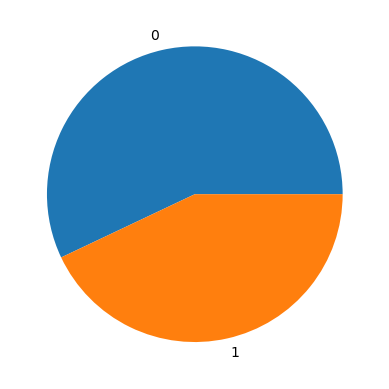

In [12]:
plt.pie([len(train_data[train_data['target']==0]), len(train_data[train_data['target']==1])], labels=[0,1])

Okay, so we have just over even representation of 0. What can we learn about the tweets?

(array([  85.,  296.,  445.,  551.,  779.,  973.,  961., 1032., 2334.,
         157.]),
 array([  7.,  22.,  37.,  52.,  67.,  82.,  97., 112., 127., 142., 157.]),
 <BarContainer object of 10 artists>)

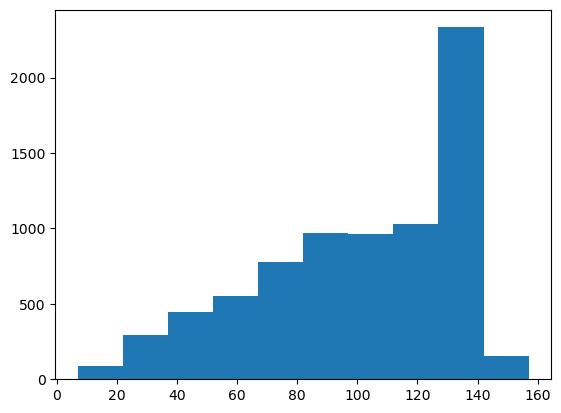

In [13]:
plt.hist([len(x) for x in train_data['text']])

(array([ 35., 111., 153., 218., 272., 408., 388., 386., 755., 537.]),
 array([  5. ,  19.6,  34.2,  48.8,  63.4,  78. ,  92.6, 107.2, 121.8,
        136.4, 151. ]),
 <BarContainer object of 10 artists>)

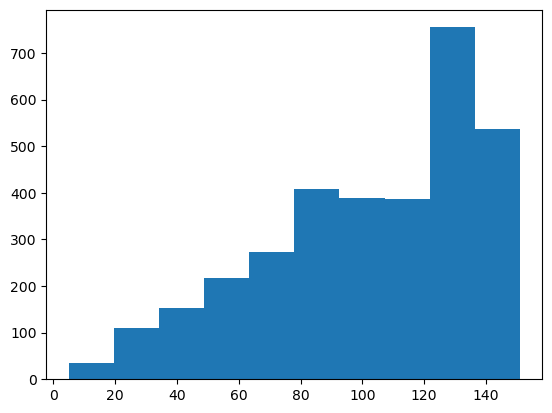

In [14]:
plt.hist([len(x) for x in test_data['text']])

Okay, these look more or less independently distributed! What else can we learn?

In [24]:
!pip install wordcloud

In [26]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

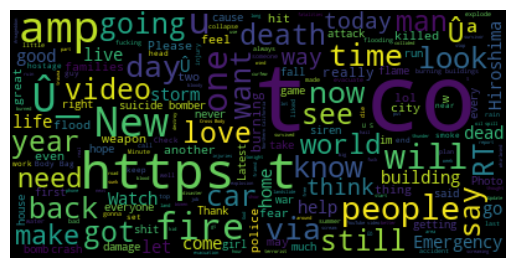

In [31]:
# adapted from https://github.com/amueller/word_cloud/blob/master/examples/simple.py
# create a subset string
wc_text = ""
for i in range(len(train_data)-1):
    wc_text += train_data['text'][i]
    wc_text += " "
wordcloud = WordCloud().generate(wc_text)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

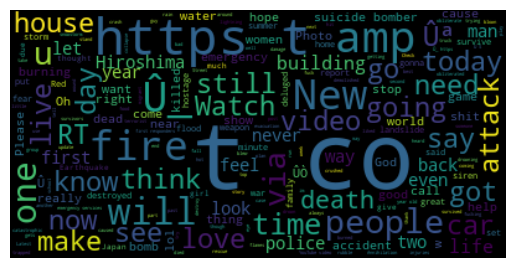

In [32]:
wc_text = ""
for i in range(len(test_data)-1):
    wc_text += test_data['text'][i]
    wc_text += " "
wordcloud = WordCloud().generate(wc_text)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Is there a difference between word clouds where target 1 and target 0?

(-0.5, 399.5, 199.5, -0.5)

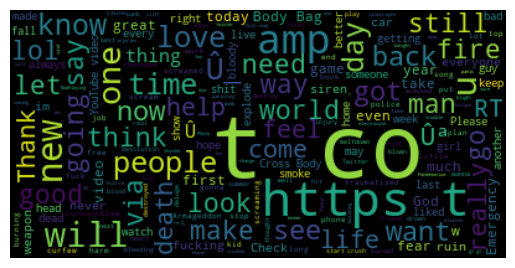

In [42]:
wc_text = ""
false_data = train_data[train_data['target']==0]
false_data.reset_index(drop=True, inplace=True)
for i in range(len(false_data)-1):
    wc_text += false_data['text'][i]
    wc_text += " "
wordcloud = WordCloud().generate(wc_text)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

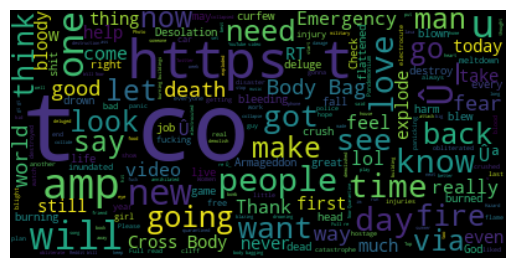

In [44]:
wc_text = ""
true_data = train_data[train_data['target']==1]
true_data.reset_index(drop=True, inplace=True)
for i in range(len(true_data)-1):
    wc_text += false_data['text'][i]
    wc_text += " "
wordcloud = WordCloud().generate(wc_text)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# NLP from the above
I wonder why Û is so popular to be visible in all of these. Anyway, I think I'll do this relatively naively.

In [45]:
import nltk

In [73]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# use english stopwords
stop_words = set(stopwords.words("english"))
# it's twitter, let me remove some things
custom_ignore = ['#', 'Û', 'http', 'https']
tokenized_text = [' '.join([t for t in word_tokenize(train_data['text'][i]) if t not in stop_words and t not in custom_ignore]) for i in range(len(train_data))]
tokenized_test_text = [' '.join([t for t in word_tokenize(test_data['text'][i]) if t not in stop_words and t not in custom_ignore]) for i in range(len(test_data))]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
tokenized_text[0]

'Our Deeds Reason earthquake May ALLAH Forgive us'

In [75]:
# adapted from the word to vec keras tutorial at https://www.tensorflow.org/tutorials/text/word2vec
vocab, index = {}, 1  # start indexing from 1
vocab['<pad>'] = 0  # add a padding token
for i in tokenized_text:
    for token in i:
      if token not in vocab:
        vocab[token] = index
        index += 1
# we need to include test vocab too!
for i in tokenized_test_text:
    for token in i:
      if token not in vocab:
        vocab[token] = index
        index += 1
vocab_size = len(vocab)
inverse_vocab = {index: token for token, index in vocab.items()}

vectorized_text = example_sequence = [[vocab[word] for word in x] for x in tokenized_text]
vectorized_test_text = example_sequence = [[vocab[word] for word in x] for x in tokenized_test_text]


I'll try to use the auto validation methods in keras's training method instead of splitting here.

# Model Time!
Let's import and use Keras and start from there.

In [68]:
import tensorflow as tf
max_features = 150
inputs = tf.keras.Input(shape=(None,), dtype="int32")
x = tf.keras.layers.Embedding(max_features, 128)(inputs)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True))(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
print(model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_4 (Embedding)     (None, None, 128)         19200     
                                                                 
 bidirectional_6 (Bidirectio  (None, None, 128)        98816     
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 216,961
Trainable params: 216,961
Non-trainab

In [69]:
x_data = tf.keras.preprocessing.sequence.pad_sequences(vectorized_text, maxlen=150)

In [76]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_data, train_data['target'], batch_size=32, epochs=10,validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 60s 266ms/step - loss: 0.6014 - accuracy: 0.6859 - val_loss: 0.5930 - val_accuracy: 0.6940
Epoch 2/10
191/191 [==============================] - 50s 259ms/step - loss: 0.5884 - accuracy: 0.6979 - val_loss: 0.5995 - val_accuracy: 0.6842
Epoch 3/10
191/191 [==============================] - 50s 261ms/step - loss: 0.5794 - accuracy: 0.7094 - val_loss: 0.5972 - val_accuracy: 0.6835
Epoch 4/10
191/191 [==============================] - 51s 266ms/step - loss: 0.5814 - accuracy: 0.7054 - val_loss: 0.6062 - val_accuracy: 0.6888
Epoch 5/10
191/191 [==============================] - 52s 274ms/step - loss: 0.5788 - accuracy: 0.7128 - val_loss: 0.5872 - val_accuracy: 0.7006
Epoch 6/10
191/191 [==============================] - 51s 266ms/step - loss: 0.5714 - accuracy: 0.7149 - val_loss: 0.6051 - val_accuracy: 0.6947
Epoch 7/10
191/191 [==============================] - 50s 262ms/step - loss: 0.5597 - accuracy: 0.7309 - val_loss: 0.6399 - val_ac

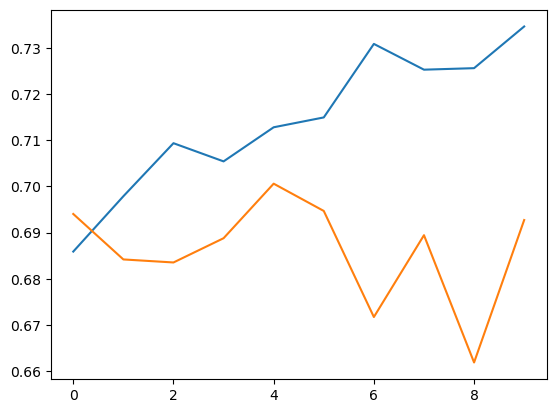

In [77]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [88]:
# we need to do identical preparation for the test data so we can predict.
x_test = tf.keras.preprocessing.sequence.pad_sequences(vectorized_test_text, maxlen=150)
submission = []
cutoff = 0.5 
yh = model.predict(x_test)
for i in range(len(yh)):
    submission.append({'id':test_data['id'][i], 'label': int(yh[i]>cutoff)})

sub = pd.DataFrame.from_records(submission)

102/102 [==============================] - 7s 65ms/step


([<matplotlib.patches.Wedge at 0x7ade86f3ec10>,
 [Text(-0.480472893744197, 0.989517962634877, '0'),
  Text(0.48047280109883733, -0.9895180076199914, '1')])

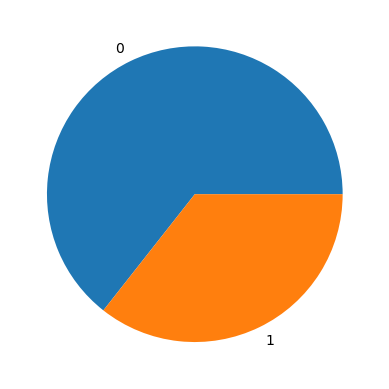

In [89]:
plt.pie([len(sub[sub['label']==0]), len(sub[sub['label']==1])], labels=[0,1])

In [95]:
# let's lower the cutoff to better match the input distribution

# we need to do identical preparation for the test data so we can predict.
x_test = tf.keras.preprocessing.sequence.pad_sequences(vectorized_test_text, maxlen=150)
submission = []
cutoff = 0.4 
yh = model.predict(x_test)
for i in range(len(yh)):
    submission.append({'id':test_data['id'][i], 'target': int(yh[i]>cutoff)})

sub = pd.DataFrame.from_records(submission)

102/102 [==============================] - 7s 66ms/step


([<matplotlib.patches.Wedge at 0x7ade865fd510>,
 [Text(-0.23384534893236902, 1.074856433568083, '0'),
  Text(0.2338453489323684, -1.074856433568083, '1')])

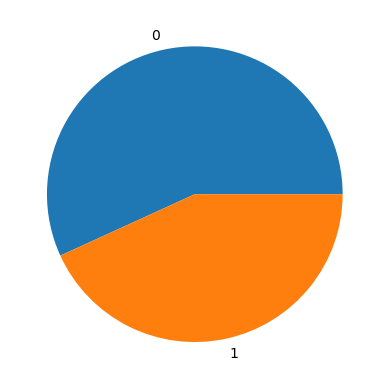

In [91]:
plt.pie([len(sub[sub['target']==0]), len(sub[sub['target']==1])], labels=[0,1])

In [96]:
sub.to_csv('/kaggle/working/submission.csv', index=False)

# Conclusion and Thoughts

The LSTM seems less fussy than the CNN stuff to me, since the sequences are simpler. In any case, I hope that tuning the threshold down is the right call.
Also, there were other fields to exploit, but I decided to keep this naive and focused only on text.